In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c playground-series-s5e6

Saving kaggle.json to kaggle.json
  0% 0.00/11.7M [00:00<?, ?B/s]
100% 11.7M/11.7M [00:00<00:00, 304MB/s]


In [2]:
!unzip /content/playground-series-s5e6.zip -d /content/playground-series-s5e6

Archive:  /content/playground-series-s5e6.zip
  inflating: /content/playground-series-s5e6/sample_submission.csv  
  inflating: /content/playground-series-s5e6/test.csv  
  inflating: /content/playground-series-s5e6/train.csv  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('/content/playground-series-s5e6/train.csv')
df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [5]:
df.shape

(750000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [7]:
df.describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [11]:
for col in df.select_dtypes('object').columns:
  print(f'{col}: {df[col].unique()}')

Soil Type: ['Clayey' 'Sandy' 'Red' 'Loamy' 'Black']
Crop Type: ['Sugarcane' 'Millets' 'Barley' 'Paddy' 'Pulses' 'Tobacco' 'Ground Nuts'
 'Maize' 'Cotton' 'Wheat' 'Oil seeds']
Fertilizer Name: ['28-28' '17-17-17' '10-26-26' 'DAP' '20-20' '14-35-14' 'Urea']


In [12]:
test_df = pd.read_csv('/content/playground-series-s5e6/test.csv')
test_df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14


In [13]:
for col in test_df.select_dtypes('object').columns:
  print(set(test_df[col].unique()).difference(df[col].unique()))

set()
set()


### above indicates that no new type of object daata will be seen during test

In [14]:
df1 = df.drop(['id'], axis=1)
df1.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28
2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,35,58,43,Red,Paddy,37,2,16,DAP


In [15]:
cols_to_ohe = ['Soil Type', 'Crop Type']

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
ct = ColumnTransformer(
    transformers=[('ohe', OneHotEncoder(drop='first'), cols_to_ohe)],
    remainder="passthrough"
)

In [76]:
y = df1['Fertilizer Name']

In [62]:
transformed = ct.fit_transform(df1.drop(['Fertilizer Name'], axis=1))

In [63]:
ohe_features = ct.named_transformers_['ohe'].get_feature_names_out()

In [72]:
all_features = list(ohe_features) + list(df1.columns.drop(cols_to_ohe))
all_features.remove('Fertilizer Name')
all_features

['Soil Type_Clayey',
 'Soil Type_Loamy',
 'Soil Type_Red',
 'Soil Type_Sandy',
 'Crop Type_Cotton',
 'Crop Type_Ground Nuts',
 'Crop Type_Maize',
 'Crop Type_Millets',
 'Crop Type_Oil seeds',
 'Crop Type_Paddy',
 'Crop Type_Pulses',
 'Crop Type_Sugarcane',
 'Crop Type_Tobacco',
 'Crop Type_Wheat',
 'Temparature',
 'Humidity',
 'Moisture',
 'Nitrogen',
 'Potassium',
 'Phosphorous']

In [73]:
df2 = pd.DataFrame(transformed, columns=all_features)
df2.head()

,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,37.0,70.0,36.0,36.0,4.0,5.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,69.0,65.0,30.0,6.0,18.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,63.0,32.0,24.0,12.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,62.0,54.0,39.0,12.0,4.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,35.0,58.0,43.0,37.0,2.0,16.0


In [74]:
df2.shape

(750000, 20)

In [29]:
df1.shape[1] + df['Soil Type'].unique().__len__() + df['Crop Type'].unique().__len__()

25

In [30]:
from xgboost import XGBClassifier

In [77]:
X = df2.copy()

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [80]:
X = X.astype(np.float32)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [82]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.19494666666666666

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [84]:
cm = confusion_matrix(y_test, xgb.predict(X_test))

In [85]:
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.19494666666666666


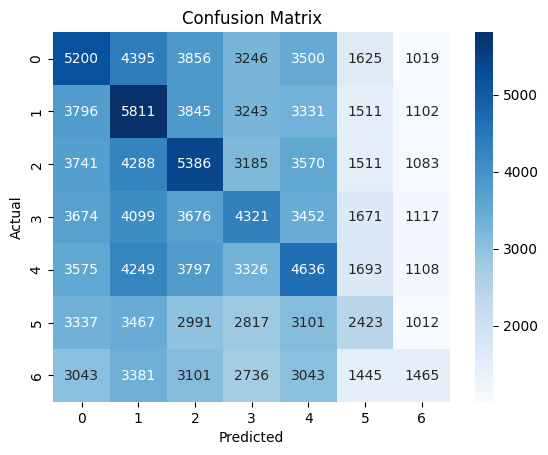

In [86]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [87]:
le.inverse_transform(y_pred)

array(['17-17-17', '10-26-26', '28-28', ..., '17-17-17', '10-26-26',
       '20-20'], dtype=object)

In [88]:
y_proba = xgb.predict_proba(X_test)

In [89]:
from sklearn.metrics import top_k_accuracy_score

In [90]:
top3_acc = top_k_accuracy_score(y_test, y_proba, k=3)

In [91]:
top3_acc

np.float64(0.5166133333333334)

In [92]:
test_df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14


In [93]:
id = test_df['id']

In [94]:
test_df1 = test_df.drop(['id'], axis=1)

In [96]:
ct.transform(test_df1).shape

(250000, 20)

In [97]:
test_df2 = pd.DataFrame(ct.transform(test_df1), columns=all_features)
test_df2.head()

,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,70.0,52.0,34.0,11.0,24.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0,62.0,45.0,30.0,14.0,15.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,72.0,28.0,14.0,15.0,4.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,53.0,57.0,18.0,17.0,36.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,31.0,55.0,32.0,13.0,19.0,14.0


In [98]:
y_prob = xgb.predict_proba(test_df2)

In [117]:
y_prob

array([[0.13287297, 0.14035818, 0.13101485, ..., 0.16353245, 0.16299689,
        0.13263986],
       [0.15111566, 0.09992237, 0.20509934, ..., 0.1500077 , 0.09179541,
        0.12382603],
       [0.16938183, 0.15967722, 0.14906394, ..., 0.13168535, 0.10835589,
        0.12907428],
       ...,
       [0.14834748, 0.18408386, 0.1406727 , ..., 0.12492631, 0.15002218,
        0.13534679],
       [0.25312638, 0.1122817 , 0.14246212, ..., 0.15848917, 0.13147841,
        0.12782755],
       [0.14742883, 0.17743121, 0.18170552, ..., 0.14541239, 0.07727228,
        0.10807388]], dtype=float32)

In [116]:
np.argsort(y_prob, axis=1)[:, -3:]

array([[1, 5, 4],
       [0, 3, 2],
       [3, 1, 0],
       ...,
       [0, 5, 1],
       [2, 4, 0],
       [3, 1, 2]])

In [120]:
np.argsort(y_prob, axis=1)[:, -3:][:,:-1]

array([[1, 5],
       [0, 3],
       [3, 1],
       ...,
       [0, 5],
       [2, 4],
       [3, 1]])

In [121]:
np.argsort(y_prob, axis=1)[:, -3:][:,::-1]

array([[4, 5, 1],
       [2, 3, 0],
       [0, 1, 3],
       ...,
       [1, 5, 0],
       [0, 4, 2],
       [2, 1, 3]])

In [107]:
top3_indices = np.argsort(y_prob, axis=1)[:, -3:][:, ::-1]  # sort & reverse to get top 3

# Convert indices back to labels
top3_labels = le.inverse_transform(top3_indices.ravel()).reshape(top3_indices.shape)

# Join the top-3 labels into a single string per row
top3_preds_joined = [' '.join(row) for row in top3_labels]

In [108]:
top3_preds_joined

['28-28 DAP 14-35-14',
 '17-17-17 20-20 10-26-26',
 '10-26-26 14-35-14 20-20',
 '14-35-14 17-17-17 DAP',
 '20-20 10-26-26 17-17-17',
 '28-28 20-20 14-35-14',
 '28-28 17-17-17 20-20',
 '28-28 DAP 17-17-17',
 '14-35-14 20-20 17-17-17',
 '20-20 17-17-17 14-35-14',
 '10-26-26 17-17-17 14-35-14',
 '28-28 14-35-14 20-20',
 '20-20 14-35-14 10-26-26',
 '20-20 28-28 17-17-17',
 '28-28 DAP 20-20',
 '20-20 17-17-17 14-35-14',
 '10-26-26 28-28 14-35-14',
 'Urea 20-20 14-35-14',
 '10-26-26 17-17-17 14-35-14',
 '14-35-14 10-26-26 DAP',
 '10-26-26 14-35-14 17-17-17',
 '10-26-26 28-28 20-20',
 '10-26-26 28-28 17-17-17',
 '20-20 14-35-14 10-26-26',
 '28-28 17-17-17 Urea',
 '17-17-17 28-28 14-35-14',
 '10-26-26 DAP 28-28',
 'DAP 10-26-26 20-20',
 '17-17-17 10-26-26 14-35-14',
 '20-20 17-17-17 28-28',
 '10-26-26 20-20 17-17-17',
 '10-26-26 Urea 17-17-17',
 '20-20 28-28 DAP',
 '10-26-26 17-17-17 14-35-14',
 'DAP 17-17-17 28-28',
 '28-28 17-17-17 Urea',
 'DAP 10-26-26 28-28',
 '28-28 DAP 10-26-26',
 'Urea 

In [109]:
len(top3_preds_joined)

250000

In [110]:
id.shape

(250000,)

In [111]:
submission_df = pd.DataFrame({
    "id": id,
    "Fertilizer Name": top3_preds_joined
})

In [112]:
submission_df.to_csv('submission.csv', index=False)